In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np


In [2]:
df = pd.read_csv('data.csv')
df_orig = pd.read_csv('data.csv')

In [3]:
df_orig.head(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
df.head(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
# file_path_csv = 'df(2).csv'
# file_path_excel = 'df.xlsx'

# df = pd.read_csv(file_path_csv)

# df.to_excel(file_path_excel, index=False)

### Выполнение рекомендаций

In [5]:
df['Полная сила потока'] = df['Сила Левого Потока'] + df['Сила Правого Потока']
df['Более полная сила потока'] = df['Полная сила потока'] + df['Приток Силы Потока']
df['Общая сила ядра'] = df['Ритм магического ядра'] * df['Приток Силы Потока']
df['Общее давление на выходе'] = df['Приток давления Выдоха Истока'] + df['Давление выдоха Истока']
df['Магическая производительность'] = df['Скорость перехода через портал'] / (df['Эмульсия Истока'] + 1e-10)
df['Эффективность ядра'] = df['Общая сила ядра'] / (df['Эмульсия Истока'] + 1e-10)
df['Магическая мощность'] = df['Эмульсия Истока'] * df['Общее давление на выходе'] * (df['Пламя Стихий'] - df['Температура вдоха Истока'])
df['Степень износа'] = df['Дыхание Истока'] / (df['Гармония Бессмертия'] + 1e-10)
df['Расхождение в стабильности магии'] = abs(df['Дыхание Истока'] - df['Гармония Бессмертия'])
df['Баланс угасания магии'] = df['Расхождение в стабильности магии'] / (df['Скорость перехода через портал'] + 1e-10)

### Подготовка данных

In [6]:
df['Температура выдоха Истока'] = pd.to_numeric(df['Температура выдоха Истока'], errors='coerce')
delta_T = df['Температура выдоха Истока'] - df['Температура вдоха Истока']
delta_T_mean = delta_T.mean()
df.loc[df['Температура выдоха Истока'].isna(), 'Температура выдоха Истока'] = df['Температура вдоха Истока'] + delta_T_mean

df['Древний Ветер'] = df['Древний Ветер'].replace('Древний Ветер развеялся', 0.1013)

### Корреляционная матрица

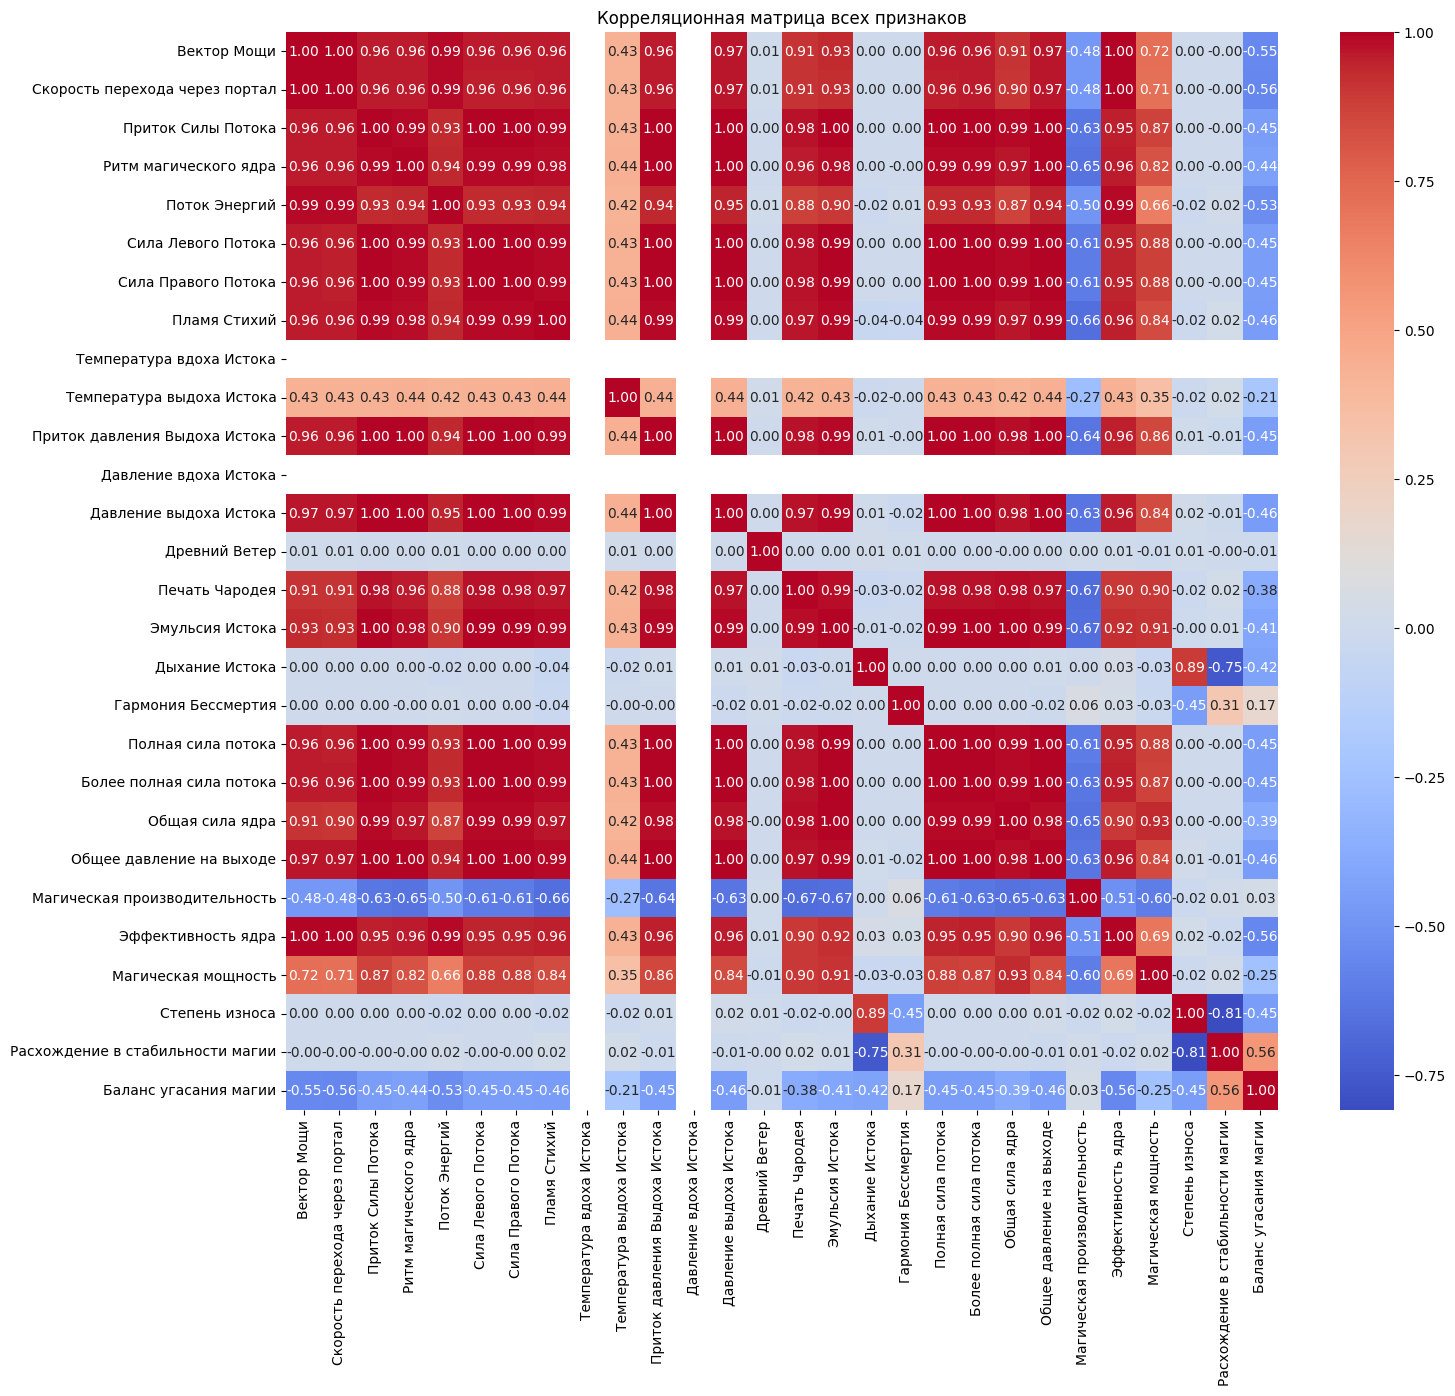

In [7]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица всех признаков")
plt.show()

### Убираем признаки, не влияющие на предсказание

In [9]:
# columns_to_drop = ['Сила Левого Потока', 'Сила Правого Потока']
# df = df.drop(columns=columns_to_drop)

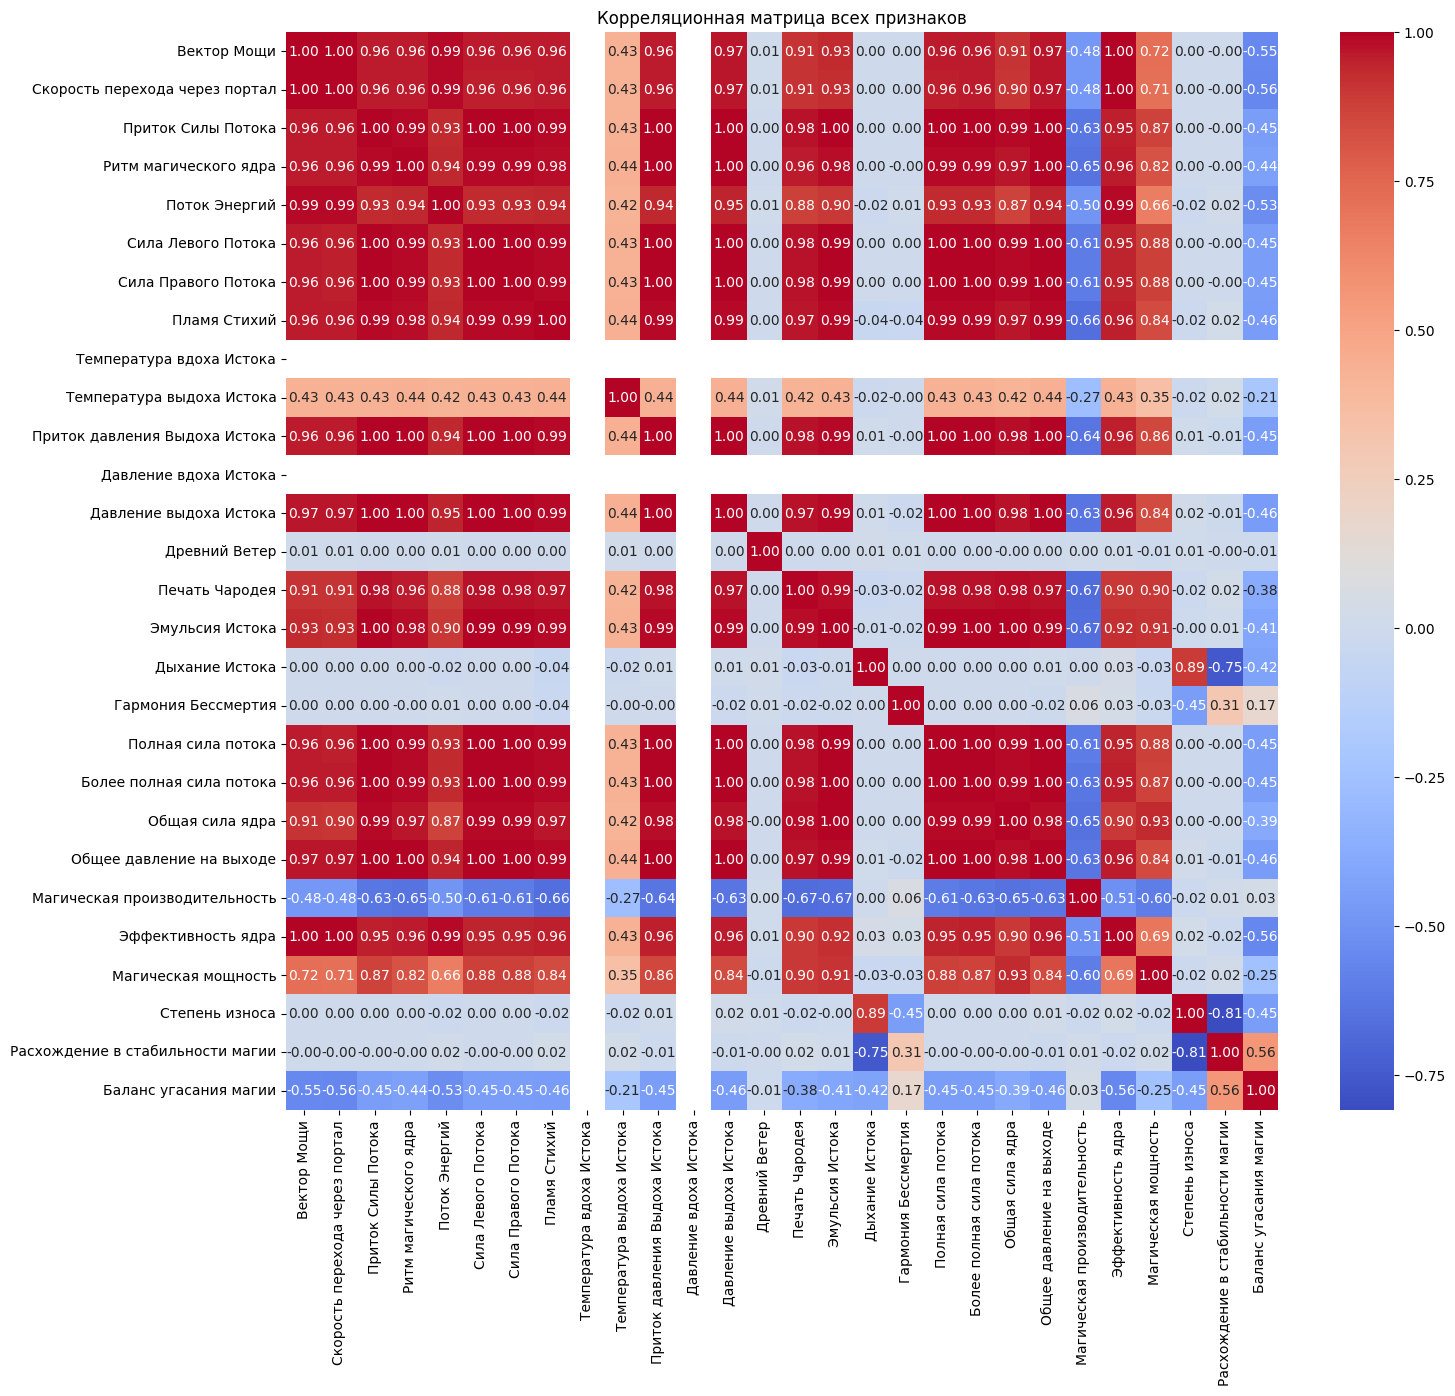

In [10]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица всех признаков")
plt.show()

### Новые признаки

In [8]:
df['ΔДавления'] = df['Давление выдоха Истока'] - df['Давление вдоха Истока']  # Разница давлений; отражает прирост давления в системе, влияющий на стабильность портала
df['Симметрия потока'] = abs(df['Сила Левого Потока'] - df['Сила Правого Потока'])  # Абсолютная разница между левым и правым потоками; дисбаланс может вызвать нестабильность
df['Энергетическая эффективность'] = df['Магическая мощность'] / (df['Эмульсия Истока'] * df['Пламя Стихий'] + 1e-10)  # Эффективность преобразования топлива и температуры в магическую мощность
df['Стресс магического ядра'] = df['Ритм магического ядра'] * df['ΔДавления']  # Комбинированная нагрузка на ядро; высокие значения могут указывать на риск отказа
df['Относительный распад магии'] = df['Расхождение в стабильности магии'] / (df['Гармония Бессмертия'] + 1e-10)  # Степень нестабильности магии относительно общего состояния портала
df['Удельная магическая мощность'] = df['Магическая мощность'] / (df['Более полная сила потока'] + 1e-10)  # Эффективность генерации магической мощности на единицу суммарного потока
df['Показатель дисбаланса потока'] = df['Симметрия потока'] / (df['Полная сила потока'] + 1e-10)  # Относительный дисбаланс потоков; важен для поддержания равновесия системы
df['Загрузка магического ядра'] = df['Ритм магического ядра'] / df['Ритм магического ядра'].max()  # Текущая нагрузка ядра относительно его максимальной мощности
df['Индекс стабильности магии'] = df['Гармония Бессмертия'] / (df['Степень износа'] + 1e-10)  # Показатель, отражающий стабильность портала несмотря на износ

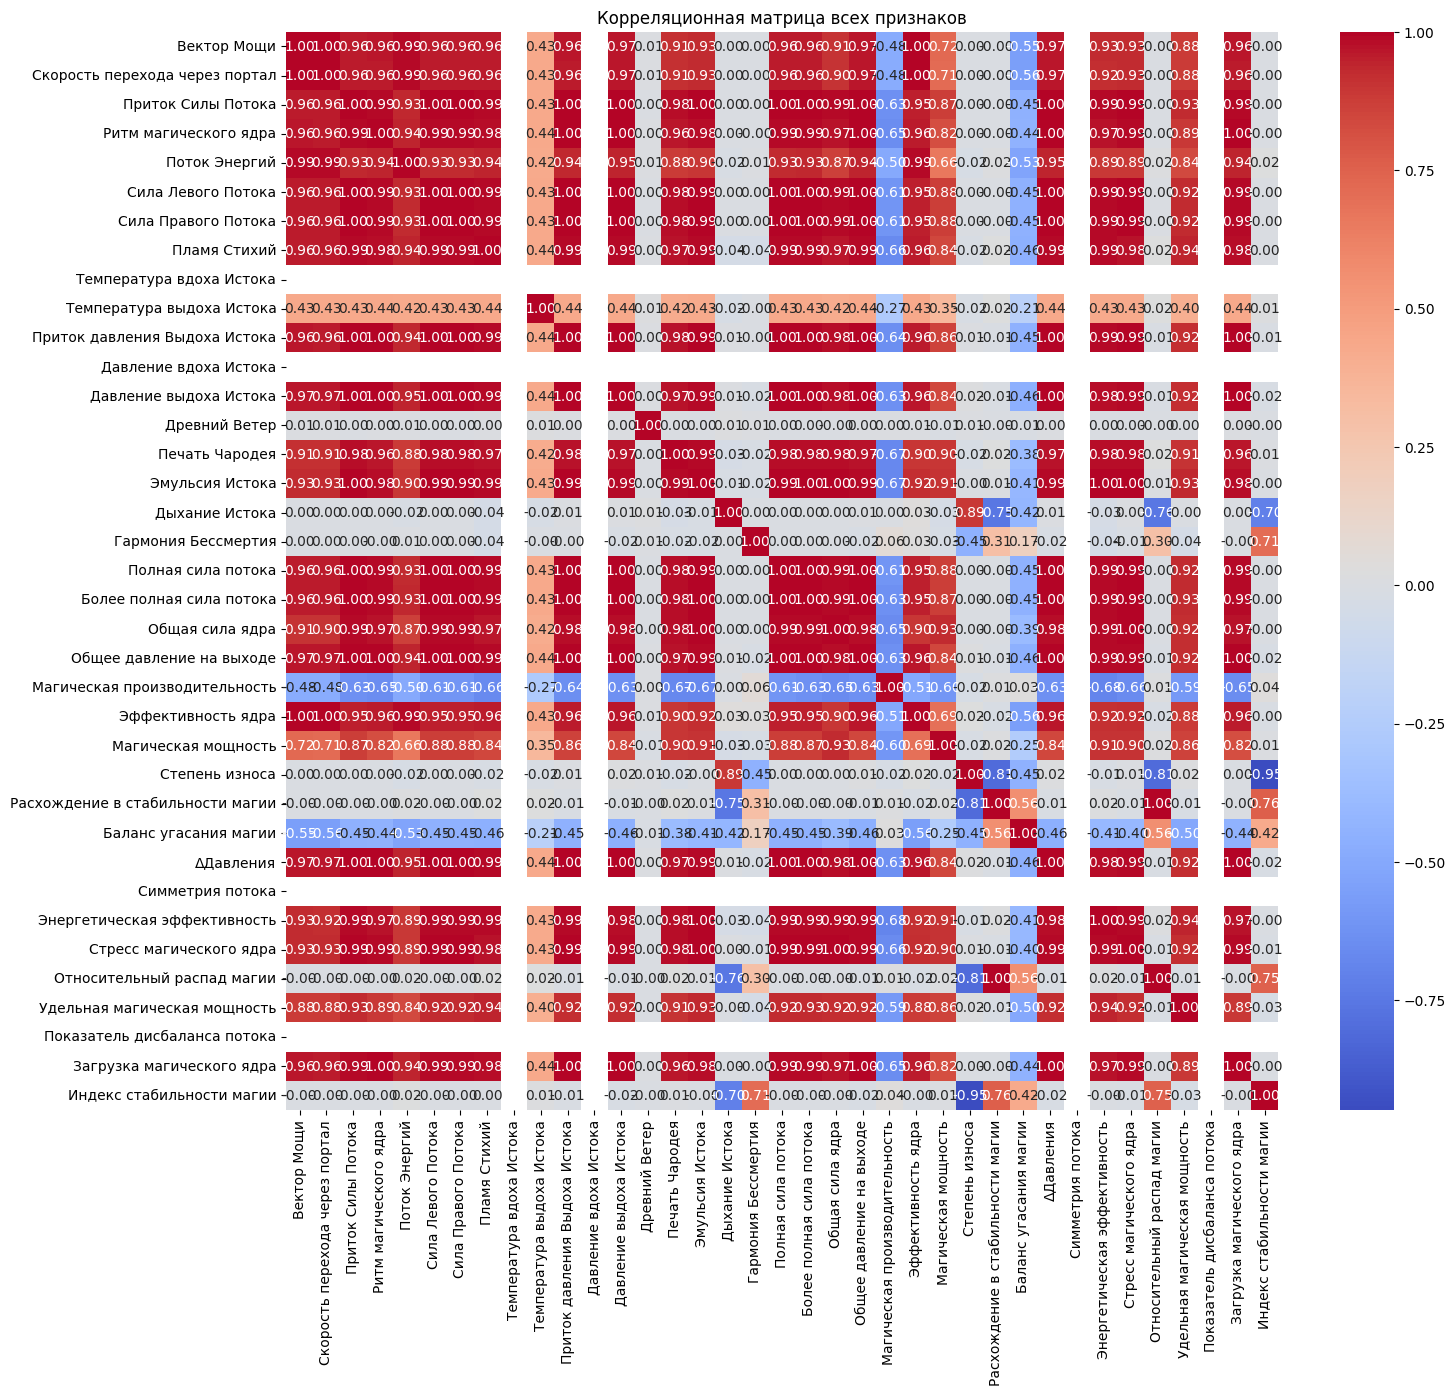

In [9]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица всех признаков")
plt.show()

### Графики

In [ ]:
# Выбор первых 5 значений
subset_df = df.head(5)

# Построение первого графика для "Сила Левого Потока", "Сила Правого Потока" и "Полная сила потока"
x = np.arange(len(subset_df))  # Позиции по оси X
width = 0.25  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, subset_df['Сила Левого Потока'], width, label='Сила Левого Потока')
ax.bar(x, subset_df['Сила Правого Потока'], width, label='Сила Правого Потока')
ax.bar(x + width, subset_df['Полная сила потока'], width, label='Полная сила потока')

ax.set_xlabel("Индекс")
ax.set_ylabel("Значение")
ax.set_title("Сравнение Сил Потоков (5 значений)")
ax.set_xticks(x)
ax.set_xticklabels(subset_df.index)
ax.legend()
plt.show()

# Построение второго графика для "Сила Левого Потока", "Сила Правого Потока", "Полная сила потока", "Приток Силы Потока", "Более полная сила потока"
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width*2, subset_df['Сила Левого Потока'], width, label='Сила Левого Потока')
ax.bar(x - width, subset_df['Сила Правого Потока'], width, label='Сила Правого Потока')
ax.bar(x, subset_df['Полная сила потока'], width, label='Полная сила потока')
ax.bar(x + width, subset_df['Приток Силы Потока'], width, label='Приток Силы Потока')
ax.bar(x + width*2, subset_df['Более полная сила потока'], width, label='Более полная сила потока')

ax.set_xlabel("Индекс")
ax.set_ylabel("Значение")
ax.set_title("Сравнение Сил Потоков (5 значений, расширенный)")
ax.set_xticks(x)
ax.set_xticklabels(subset_df.index)
ax.legend()
plt.show()


### Модели

In [ ]:
x = df.drop(columns=['Гармония Бессмертия'])  # Features
y = df['Гармония Бессмертия']  # Target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

best_models = {}
metrics = {}

def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np(root_mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
best_models['Random Forest'] = best_rf
metrics['Random Forest'] = calculate_metrics(best_rf, X_test, y_test)

gb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
best_models['Gradient Boosting'] = best_gb
metrics['Gradient Boosting'] = calculate_metrics(best_gb, X_test, y_test)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
xgb = XGBRegressor(tree_method='gpu_hist', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
best_models['XGBoost'] = best_xgb
metrics['XGBoost'] = calculate_metrics(best_xgb, X_test, y_test)

# cat_params = {
#     'iterations': [100, 200],
#     'depth': [3, 5],
#     'learning_rate': [0.01, 0.1]
# }
# cat = CatBoostRegressor(task_type="GPU", random_state=42, verbose=0)
# cat_grid = GridSearchCV(cat, cat_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# cat_grid.fit(X_train, y_train)
# best_cat = cat_grid.best_estimator_
# best_models['CatBoost'] = best_cat
# metrics['CatBoost'] = calculate_metrics(best_cat, X_test, y_test)

for model_name, (rmse, r2) in metrics.items():
    print(f"Модель: {model_name}")
    print(f"Лучшие параметры: {best_models[model_name].get_params()}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("-" * 30)

KeyboardInterrupt: 